In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from arch.univariate import ARCH, ConstantMean, Normal
from arch import arch_model
from scipy import stats
from statsmodels.stats.diagnostic import acorr_ljungbox
plt.rcParams["figure.figsize"] = (16, 9)

In [45]:
m5_data = pd.read_csv('M5. goog_eur_10.csv')

m5_data['Date2'] = pd.to_datetime(m5_data['Date'], format='%m/%d/%Y')
goog = m5_data.loc[:, ['Date2', 'GOOGLE']].set_index('Date2')
goog["GOOGLE_R"] = np.log(goog["GOOGLE"]).diff().dropna()

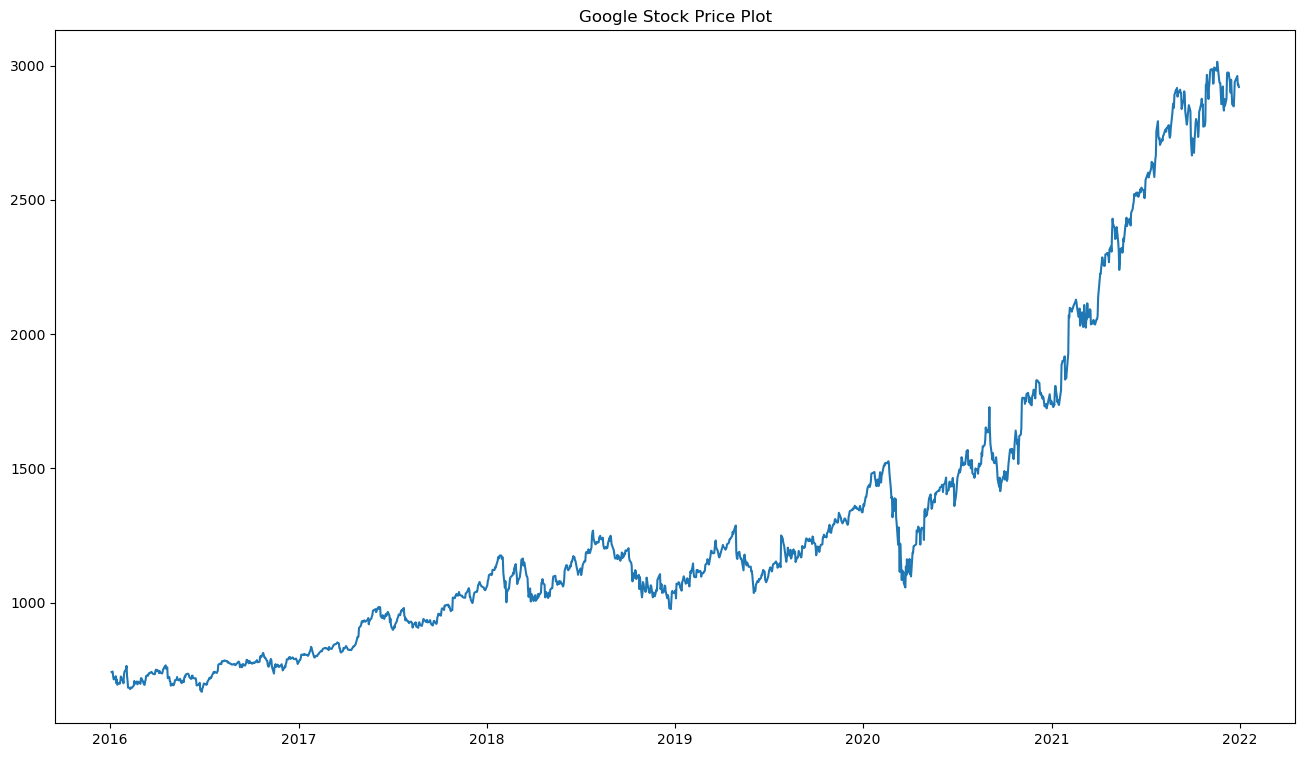

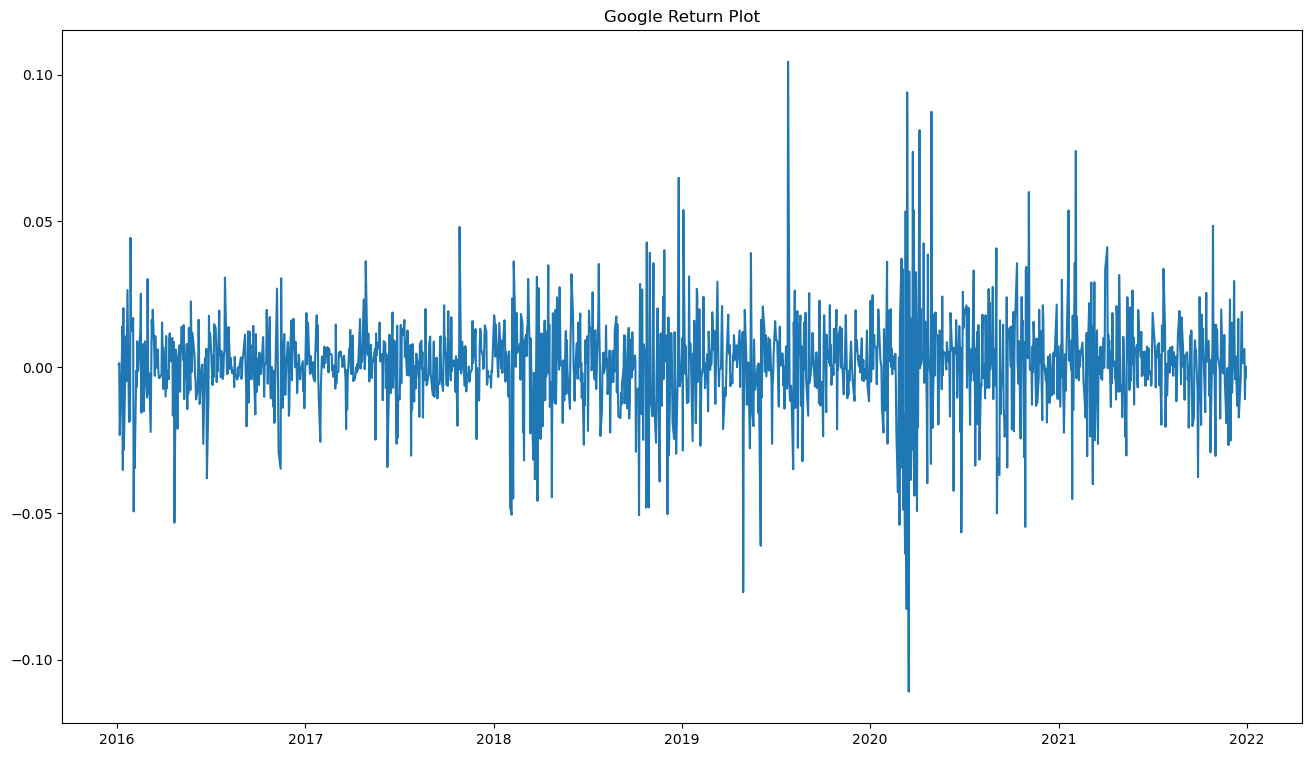

In [ ]:
plt.plot(goog.GOOGLE)
plt.title('Google Stock Price Plot')
plt.show()


plt.plot(goog.GOOGLE_R)
plt.title('Google Return Plot')
plt.show();


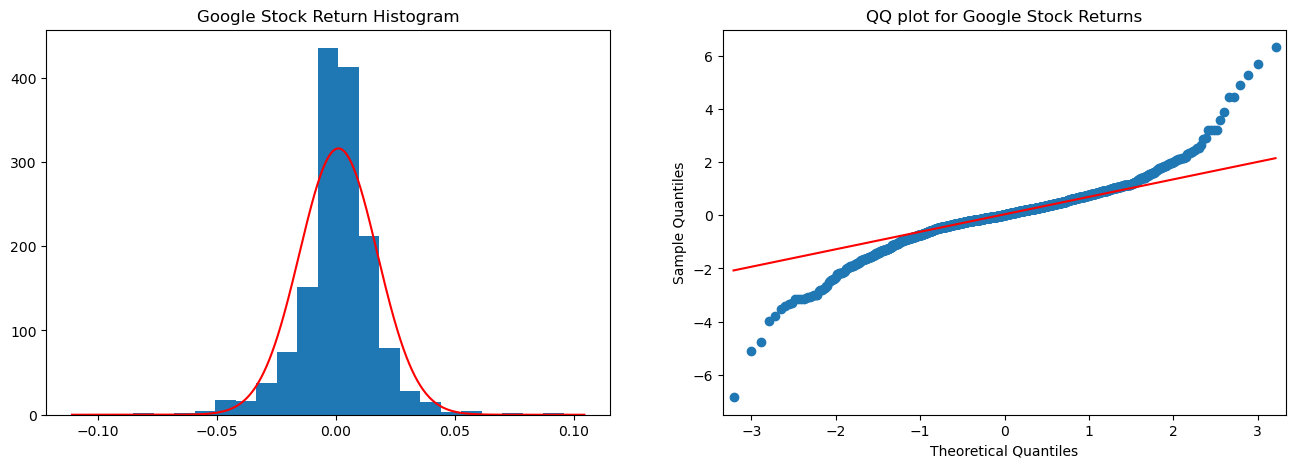

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))
goog_r = goog.GOOGLE_R.dropna()

x= np.linspace(min(goog_r), max(goog_r), len(goog_r))
(mu, sigma) = stats.norm.fit(goog_r)
values, bins, _ = ax1.hist(goog_r, bins=25)
ax1.plot(x, stats.norm.pdf(x, mu, sigma)*sum(values*np.diff(bins)),'r')
ax1.set(title='Google Stock Return Histogram')

#QQ plot
sm.qqplot(goog_r, stats.norm, fit=True, line='q', ax=ax2)
ax2.set(title='QQ plot for Google Stock Returns')
plt.show();

# ARCH(1) SIMULATION

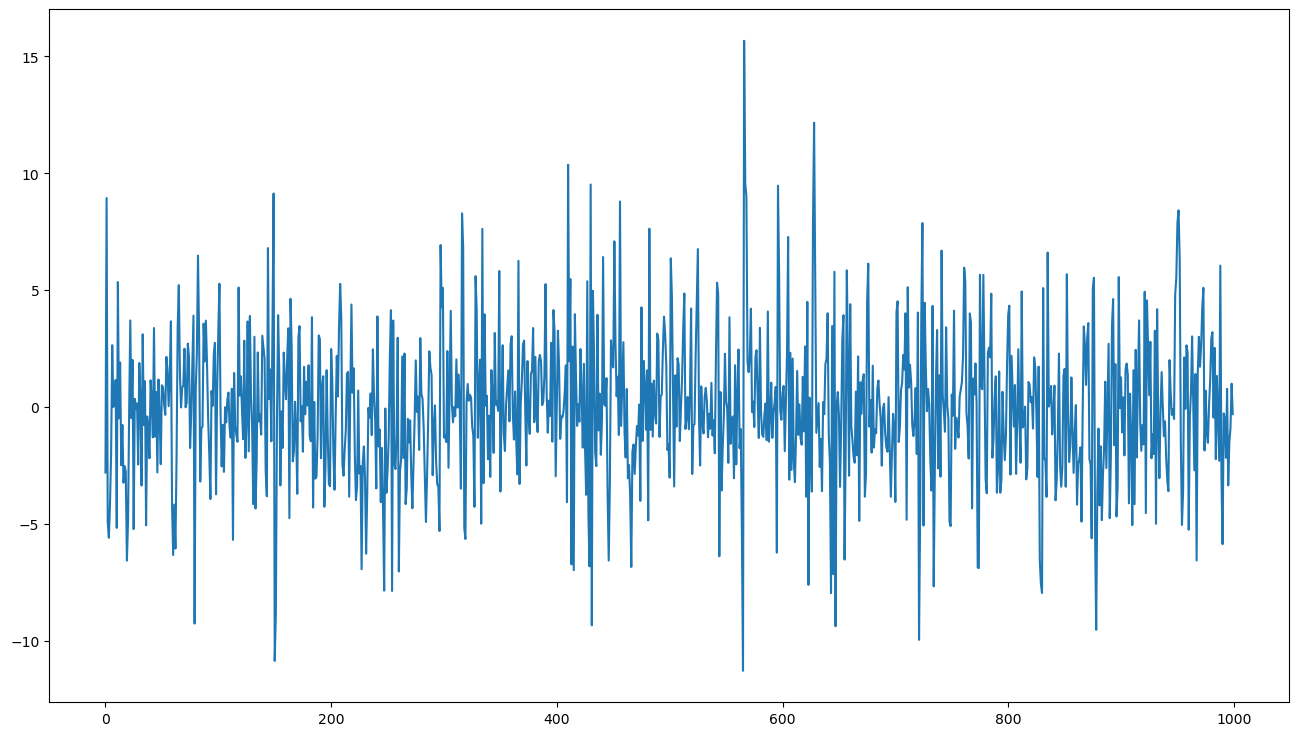

In [21]:
rs = np.random.RandomState([12345,77777])
dist=Normal(seed=rs)
vol = ARCH(p=1)
repro_mod = ConstantMean(None, volatility=vol, distribution=dist)
params=pd.Series({'mu':0.0, 'omega':5, 'alpha[1]':0.5, 'beta[1]':0.0})

arch1_sim = repro_mod.simulate(params, nobs=1000)
plt.plot(arch1_sim.data)
plt.show()


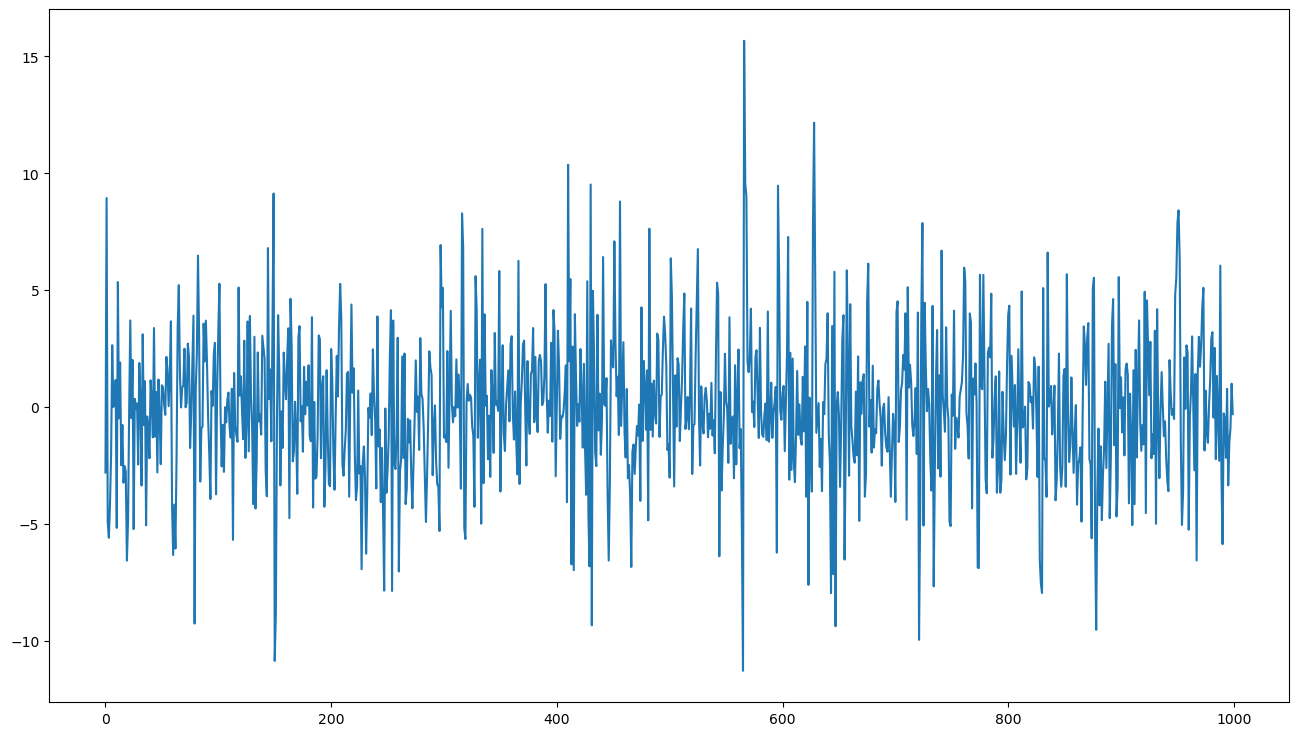

## ACF and PACF of ARCH(1)

(-0.2, 0.2)

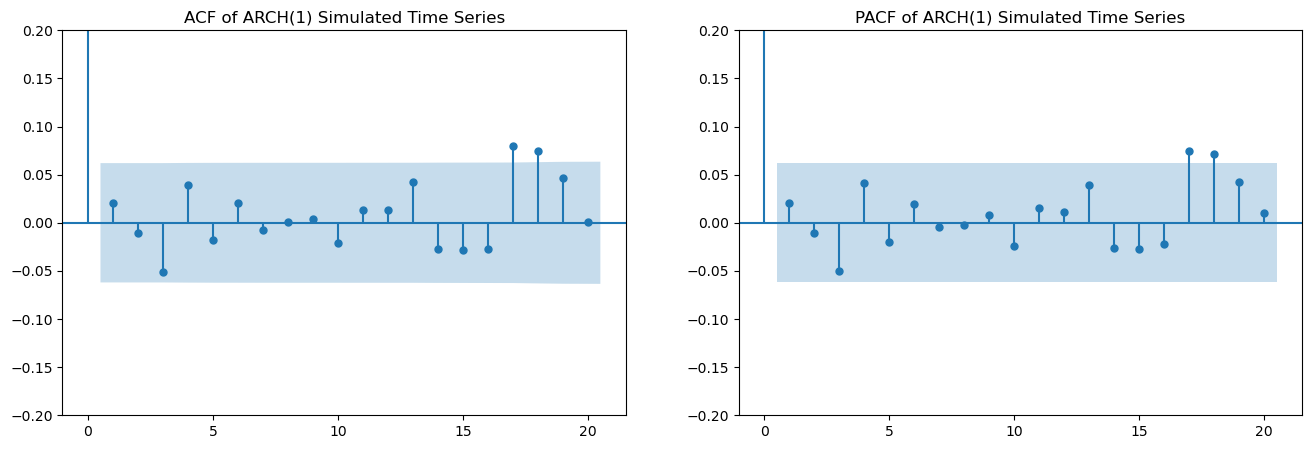

In [24]:
# ACF and PACF of ARCH(1) Simulated Time Series
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sm.graphics.tsa.plot_acf(arch1_sim.data.dropna(), lags=20, ax=ax1)
ax1.set(title="ACF of ARCH(1) Simulated Time Series")
ax1.set_ylim([-0.2, 0.2])

sm.graphics.tsa.plot_pacf(arch1_sim.data.dropna(), lags=20, ax=ax2)
ax2.set(title="PACF of ARCH(1) Simulated Time Series")
ax2.set_ylim([-0.2, 0.2])


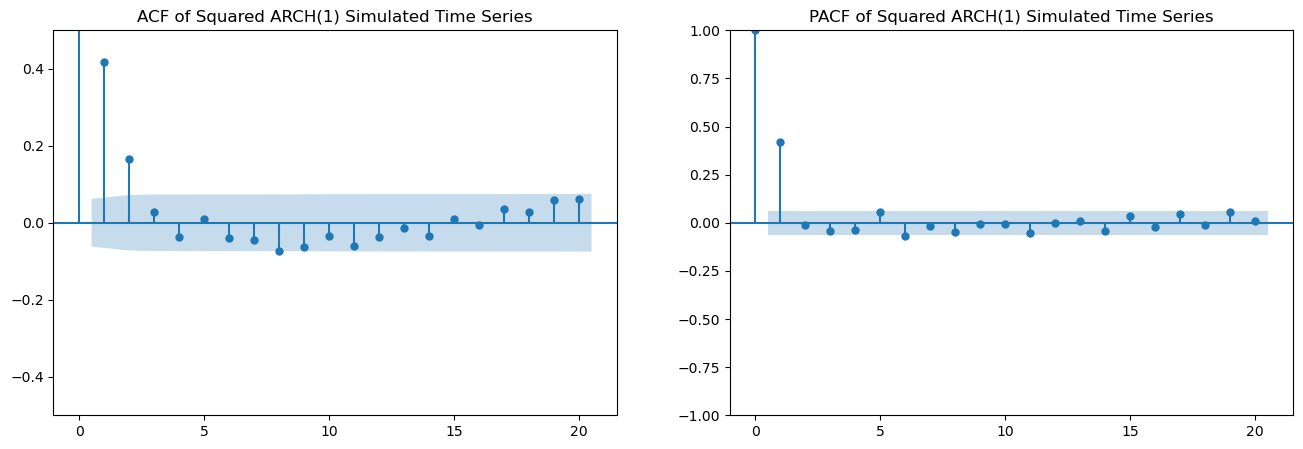

In [26]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
sm.graphics.tsa.plot_acf(arch1_sim.data.dropna()**2, lags=20,ax=ax1)
ax1.set(title="ACF of Squared ARCH(1) Simulated Time Series")
ax1.set_ylim([-0.5, 0.5])

sm.graphics.tsa.plot_pacf(arch1_sim.data.dropna()**2, lags=20,ax=ax2)
ax2.set(title="PACF of Squared ARCH(1) Simulated Time Series")
ax1.set_ylim([-0.5, 0.5]);

# L2 GARCH MODEL

Text(0, 0.5, 'Google Stock Return')

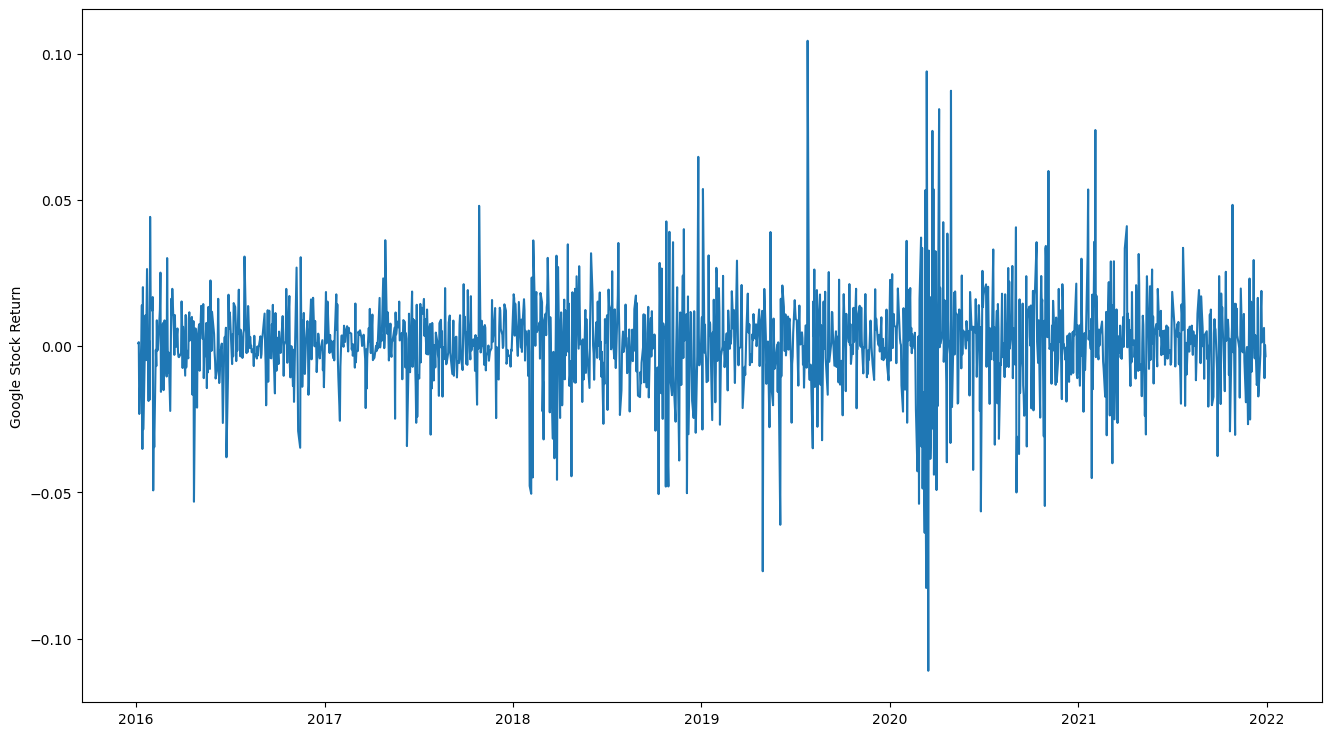

In [27]:
plt.plot(goog.GOOGLE_R)
plt.ylabel('Google Stock Return')

Text(0.5, 1.0, 'Google Stock Returns histogram')

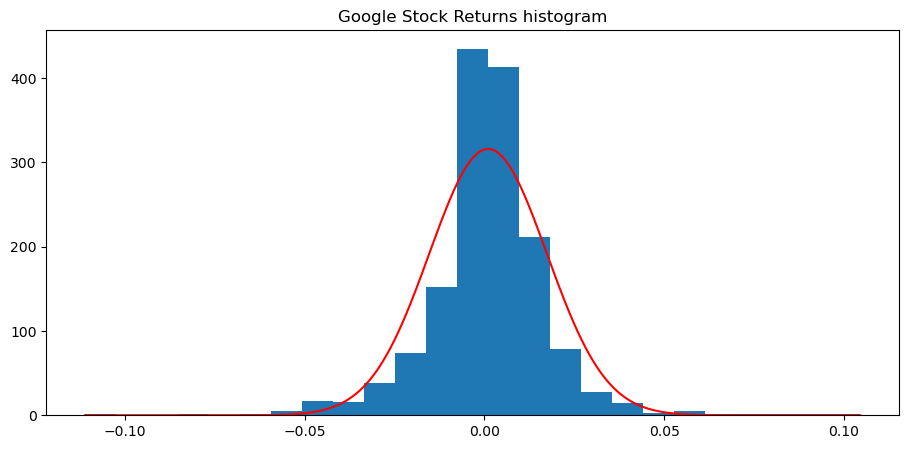

In [32]:
plt.figure(figsize=(11,5))
goog_r = goog.GOOGLE_R.dropna()

x = np.linspace(min(goog_r), max(goog_r), len(goog_r))
values, bins, _ = plt.hist(goog_r, bins=25)

(mu, sigma) = stats.norm.fit(goog_r)
plt.plot(x, stats.norm.pdf(x, mu, sigma) * sum(values * np.diff(bins)), 'r')

plt.title('Google Stock Returns histogram')

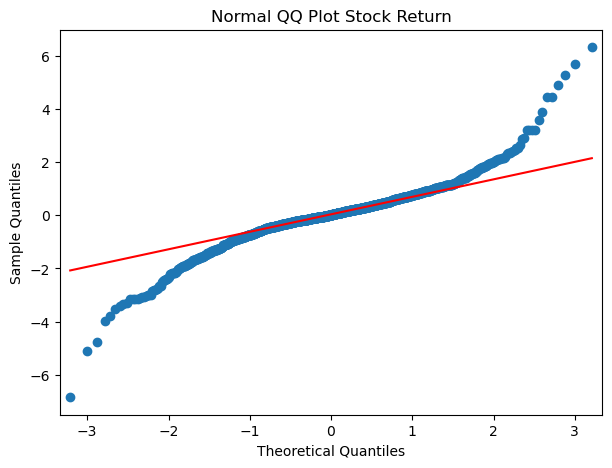

In [33]:
qq = sm.qqplot(goog_r, stats.norm, fit=True, line='q')
qq.set_size_inches((7,5))
plt.title('Normal QQ Plot Stock Return');

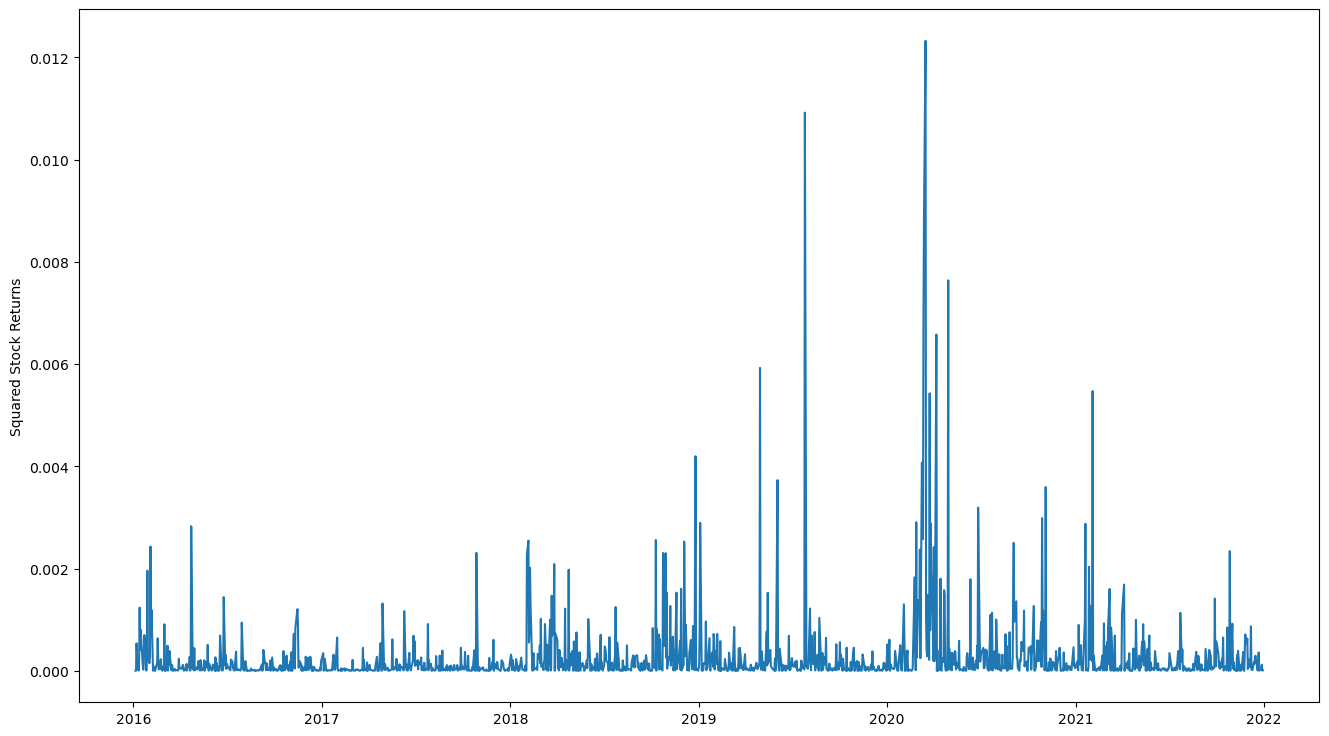

In [34]:
plt.plot(goog.GOOGLE_R**2)
plt.ylabel('Squared Stock Returns');

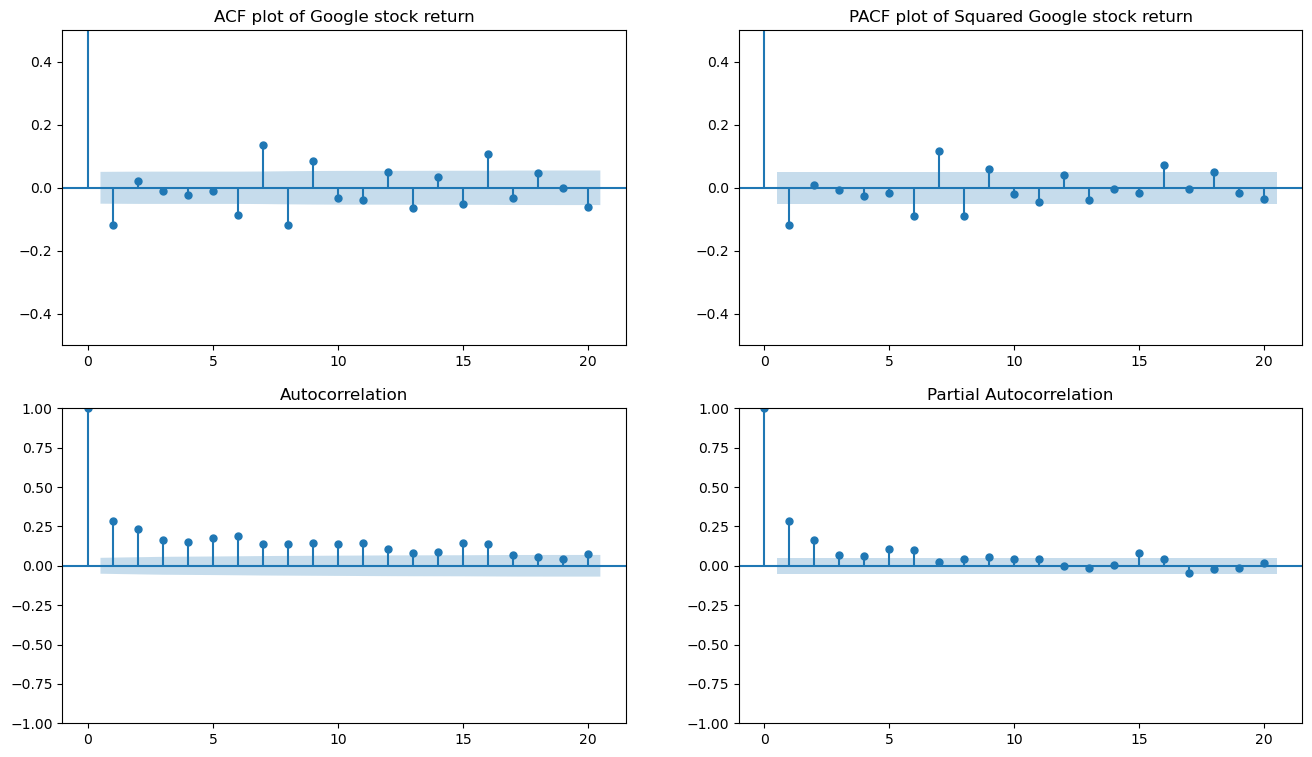

In [37]:
(fig, ax) = plt.subplots(2,2)
sm.graphics.tsa.plot_acf(goog.GOOGLE_R.dropna(), lags=20, ax=ax[0,0])
ax[0, 0].set(title="ACF plot of Google stock return")
ax[0, 0].set_ylim([-0.5, 0.5])

sm.graphics.tsa.plot_pacf(goog.GOOGLE_R.dropna(), lags=20, ax=ax[0,1])
ax[0, 1].set(title="PACF plot of Google stock return")
ax[0, 1].set_ylim([-0.5, 0.5])

sm.graphics.tsa.plot_acf(goog.GOOGLE_R.dropna()**2, lags=20, ax=ax[1,0])
ax[0, 1].set(title="ACF plot of Squared Google stock return")
ax[0, 1].set_ylim([-0.5, 0.5])

sm.graphics.tsa.plot_pacf(goog.GOOGLE_R.dropna()**2, lags=20, ax=ax[1,1])
ax[0, 1].set(title="PACF plot of Squared Google stock return")
ax[0, 1].set_ylim([-0.5, 0.5]);



# Modeling a GARCH 1,1

In [46]:
garch11_spec = arch_model(
    goog.GOOGLE_R.dropna(),
    vol='GARCH',
    p=1,
    q=1,
    mean='AR',
    dist='Normal',
    rescale=True
)
garch11_fit = garch11_spec.fit()
garch11_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 18102370089.838078
Iteration:      2,   Func. Count:     14,   Neg. LLF: 199289710361.31866
Iteration:      3,   Func. Count:     23,   Neg. LLF: 2905.730302628701
Iteration:      4,   Func. Count:     31,   Neg. LLF: 2886.925378396835
Iteration:      5,   Func. Count:     38,   Neg. LLF: 2728.1622986296334
Iteration:      6,   Func. Count:     43,   Neg. LLF: 2727.9777720000106
Iteration:      7,   Func. Count:     48,   Neg. LLF: 2727.9469065715693
Iteration:      8,   Func. Count:     53,   Neg. LLF: 2727.9393448273977
Iteration:      9,   Func. Count:     58,   Neg. LLF: 2727.937888260677
Iteration:     10,   Func. Count:     63,   Neg. LLF: 2727.9370769987204
Iteration:     11,   Func. Count:     68,   Neg. LLF: 2727.937067484191
Iteration:     12,   Func. Count:     72,   Neg. LLF: 2727.9370674840043
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2727.937067484191
            Iteratio

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:               GOOGLE_R   R-squared:                       0.000
Mean Model:                        AR   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2727.94
Distribution:                  Normal   AIC:                           5463.87
Method:            Maximum Likelihood   BIC:                           5485.14
                                        No. Observations:                 1504
Date:                Mon, Jun 09 2025   Df Residuals:                     1503
Time:                        16:54:37   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
Const          0.1114  4.019e-02      2.772  5.578e-03 [3.262e-02,  0.190]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1250  9.366e-02      1.335      0.182 [-5.858e-02,  0.309]
alpha[1]       0.0822  3.786e-02      2.170  2.999e-02  [7.959e-03,  0.156]
beta[1]        0.8671  6.959e-02     12.461  1.223e-35    [  0.731,  1.004]
===========================================================================

Covariance estimator: robust
"""

In [42]:
# Diagnostic tests for GARCH(1,1) Model with Normal White Noise
print("GARCH(1,1) Model with Normal White Noise\n")

# Ljung-Box test and the Box-Pierce test
print("Ljung-Box and Box-Pierce tests on stanrdized residuals")
print(acorr_ljungbox(garch11_fit.std_resid, boxpierce=True))

print("\nLjung-Box and Box-Pierce tests on stanrdized squared residuals")
print(acorr_ljungbox(garch11_fit.std_resid**2, boxpierce=True))

# ARCH LM test for conditional heteroskedasticity
print("\nARCH LM test for conditional heteroskedasticity")
print(garch11_fit.arch_lm_test(standardized=True))

GARCH(1,1) Model with Normal White Noise

Ljung-Box and Box-Pierce tests on stanrdized residuals
      lb_stat  lb_pvalue    bp_stat  bp_pvalue
1    0.505667   0.477021   0.504659   0.477460
2    0.674439   0.713752   0.672984   0.714272
3    1.652755   0.647488   1.648051   0.648544
4    2.185331   0.701716   2.178505   0.702966
5    6.904451   0.227844   6.875691   0.230051
6    8.305550   0.216562   8.269347   0.219027
7   13.544232   0.059907  13.476722   0.061311
8   17.843888   0.022428  17.747828   0.023199
9   18.065182   0.034425  17.967506   0.035552
10  18.538770   0.046528  18.437320   0.048020

Ljung-Box and Box-Pierce tests on stanrdized squared residuals
     lb_stat  lb_pvalue   bp_stat  bp_pvalue
1   0.005005   0.943600  0.004995   0.943657
2   0.093533   0.954310  0.093287   0.954427
3   0.101747   0.991627  0.101474   0.991660
4   0.108782   0.998573  0.108481   0.998581
5   0.601256   0.987946  0.598667   0.988064
6   0.607212   0.996279  0.604591   0.996323
7   1.5

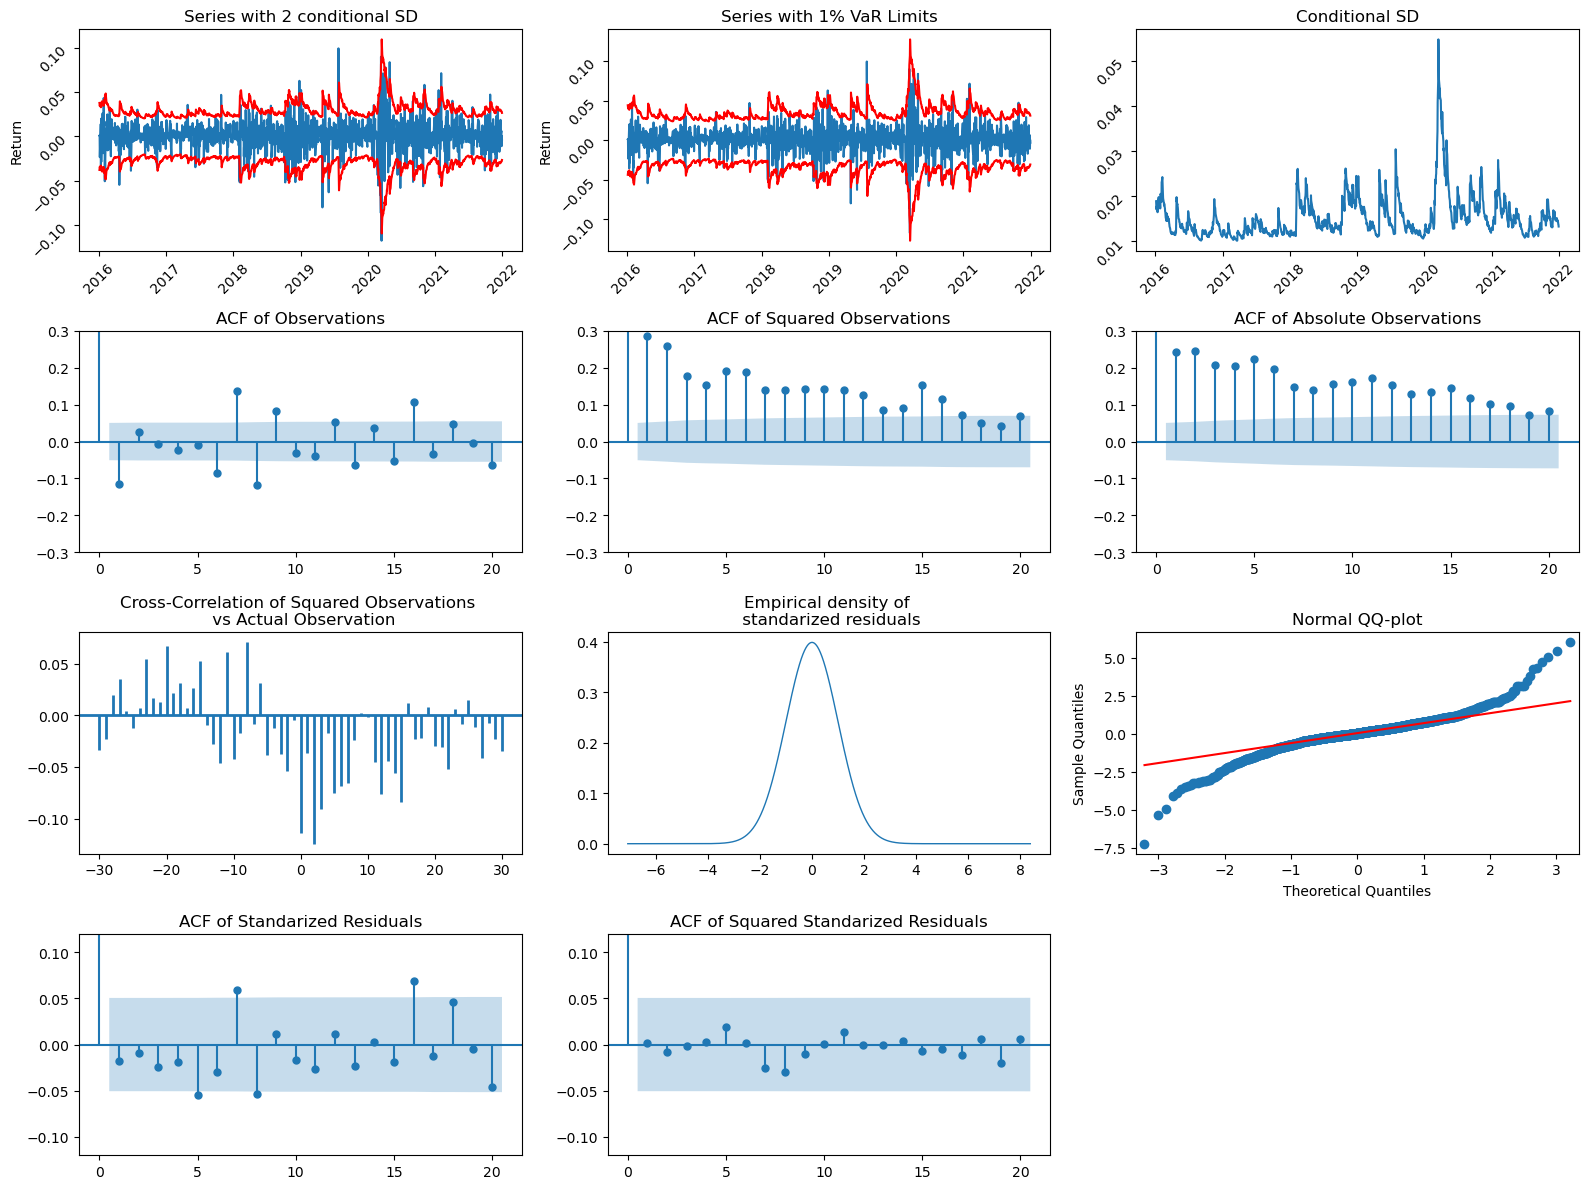

In [47]:
# Model Diagnostic Plots for the GARCH(1,1) Model with Normal White Noise
fig, ax = plt.subplots(4, 3, figsize=(16, 12))

# Figure Row 1 Column 1
ax[0, 0].plot(goog.GOOGLE_R)
ax[0, 0].plot(2.0 * garch11_fit.conditional_volatility / 100.0, c="r")
ax[0, 0].plot(-2.0 * garch11_fit.conditional_volatility / 100.0, c="r")
ax[0, 0].tick_params(labelrotation=45)
ax[0, 0].set_title("Series with 2 conditional SD")
ax[0, 0].set_ylabel("Return")

# Figure Row 1 Column 2
VaR_1 = stats.norm.ppf(0.99)
ax[0, 1].plot(goog.GOOGLE_R)
ax[0, 1].plot(VaR_1 * garch11_fit.conditional_volatility / 100.0, c="r")
ax[0, 1].plot(-VaR_1 * garch11_fit.conditional_volatility / 100.0, c="r")
ax[0, 1].tick_params(labelrotation=45)
ax[0, 1].set_title("Series with 1% VaR Limits")
ax[0, 1].set_ylabel("Return")

# Figure Row 1 Column 3
ax[0, 2].plot(garch11_fit.conditional_volatility / 100.0)
ax[0, 2].set_title("Conditional SD")
ax[0, 2].tick_params(labelrotation=45)

# Figure Row 2 Column 1
sm.graphics.tsa.plot_acf(garch11_fit.resid / 100.0, lags=20, ax=ax[1, 0])
ax[1, 0].set_title("ACF of Observations")
ax[1, 0].set_ylim([-0.3, 0.3])

# Figure Row 2 Column 2
sm.graphics.tsa.plot_acf(garch11_fit.resid**2, lags=20, ax=ax[1, 1])
ax[1, 1].set_title("ACF of Squared Observations")
ax[1, 1].set_ylim([-0.3, 0.3])

# Figure Row 2 Column 3
sm.graphics.tsa.plot_acf(np.abs(garch11_fit.resid), lags=20, ax=ax[1, 2])
ax[1, 2].set_title("ACF of Absolute Observations")
ax[1, 2].set_ylim([-0.3, 0.3])

# Figure Row 3 Column 1
ax[2, 0].xcorr(
    garch11_fit.resid**2,
    garch11_fit.resid,
    usevlines=True,
    maxlags=30,
    normed=True,
    lw=2,
)
ax[2, 0].set_title("Cross-Correlation of Squared Observations \n vs Actual Observation")

# Figure Row 3 Column 2
standaraized_residuals = garch11_fit.std_resid
min_val = np.min(standaraized_residuals)
max_val = np.max(standaraized_residuals)
empirical_density = np.linspace(min_val, max_val, len(standaraized_residuals))
ax[2, 1].plot(empirical_density, stats.norm.pdf(empirical_density), lw=1)
ax[2, 1].set_title("Empirical density of \n standarized residuals")

# Figure Row 3 Column 3
sm.qqplot(garch11_fit.resid, stats.norm, fit=True, line="q", ax=ax[2, 2])
ax[2, 2].set_title("Normal QQ-plot")

# Figure Row 4 Column 1
sm.graphics.tsa.plot_acf(garch11_fit.std_resid, lags=20, ax=ax[3, 0])
ax[3, 0].set_title("ACF of Standarized Residuals")
ax[3, 0].set_ylim([-0.12, 0.12])

# Figure Row 4 Column 2
sm.graphics.tsa.plot_acf((garch11_fit.std_resid) ** 2, lags=20, ax=ax[3, 1])
ax[3, 1].set_title("ACF of Squared Standarized Residuals")
ax[3, 1].set_ylim([-0.12, 0.12])

ax[3, 2].axis("off")
fig.tight_layout()
plt.show()

In [51]:
garch11_t_fit = arch_model(
    goog.GOOGLE_R.dropna(),
    vol='GARCH',
    p=1,
    q=1,
    mean='AR',
    dist='StudentsT',
    rescale=True
).fit()
garch11_t.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 44460.09922944116
Iteration:      2,   Func. Count:     16,   Neg. LLF: 27005.829998976977
Iteration:      3,   Func. Count:     24,   Neg. LLF: 4643.085422573049
Iteration:      4,   Func. Count:     32,   Neg. LLF: 3989.0180594529356
Iteration:      5,   Func. Count:     41,   Neg. LLF: 3675.46031225776
Iteration:      6,   Func. Count:     48,   Neg. LLF: 2649.5004902070314
Iteration:      7,   Func. Count:     55,   Neg. LLF: 2766.3934879003095
Iteration:      8,   Func. Count:     62,   Neg. LLF: 2605.904525379311
Iteration:      9,   Func. Count:     68,   Neg. LLF: 2605.613036755023
Iteration:     10,   Func. Count:     75,   Neg. LLF: 2605.0821220917583
Iteration:     11,   Func. Count:     81,   Neg. LLF: 2604.9510046012065
Iteration:     12,   Func. Count:     87,   Neg. LLF: 2604.886371047379
Iteration:     13,   Func. Count:     93,   Neg. LLF: 2604.8534889473412
Iteration:     14,   Func. Count:     99,   Neg. LLF: 2604

<class 'statsmodels.iolib.summary.Summary'>
"""
                              AR - GARCH Model Results                              
====================================================================================
Dep. Variable:                     GOOGLE_R   R-squared:                       0.000
Mean Model:                              AR   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2604.84
Distribution:      Standardized Student's t   AIC:                           5219.69
Method:                  Maximum Likelihood   BIC:                           5246.27
                                              No. Observations:                 1504
Date:                      Mon, Jun 09 2025   Df Residuals:                     1503
Time:                              16:58:33   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
Const          0.1487  2.799e-02      5.313  1.081e-07 [9.383e-02,  0.204]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0616  2.976e-02      2.071  3.838e-02 [3.297e-03,  0.120]
alpha[1]       0.1039  2.528e-02      4.111  3.943e-05 [5.438e-02,  0.153]
beta[1]        0.8865  2.642e-02     33.552 8.423e-247   [  0.835,  0.938]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             3.6441      0.364     10.013  1.337e-23 [  2.931,  4.357]
========================================================================

Covariance estimator: robust
"""

In [52]:
# Diagnostic tests for GARCH(1,1) Model with Student's t White Noise
print("GARCH(1,1) Model with StudentsT White Noise\n")

# Ljung-Box test and the Box-Pierce test
print("Ljung-Box and Box-Pierce tests on stanrdized residuals")
print(acorr_ljungbox(garch11_t_fit.std_resid, boxpierce=True))

print("\nLjung-Box and Box-Pierce tests on stanrdized squared residuals")
print(acorr_ljungbox(garch11_t_fit.std_resid**2, boxpierce=True))

# ARCH LM test for conditional heteroskedasticity
print("\nARCH LM test for conditional heteroskedasticity for")
print(garch11_t_fit.arch_lm_test(standardized=True))

GARCH(1,1) Model with StudentsT White Noise

Ljung-Box and Box-Pierce tests on stanrdized residuals
      lb_stat  lb_pvalue    bp_stat  bp_pvalue
1    0.053823   0.816539   0.053716   0.816719
2    0.204105   0.902982   0.203598   0.903211
3    1.270875   0.736061   1.266827   0.737025
4    1.718776   0.787304   1.712944   0.788365
5    6.361299   0.272633   6.333888   0.275072
6    7.381354   0.287014   7.348524   0.289815
7   11.470263   0.119381  11.412997   0.121591
8   15.396911   0.051872  15.313572   0.053327
9   15.404727   0.080402  15.321331   0.082479
10  15.902260   0.102465  15.814899   0.105055

Ljung-Box and Box-Pierce tests on stanrdized squared residuals
     lb_stat  lb_pvalue   bp_stat  bp_pvalue
1   0.010544   0.918215  0.010523   0.918296
2   0.327440   0.848980  0.326578   0.849346
3   0.403562   0.939506  0.402447   0.939737
4   0.404217   0.982130  0.403099   0.982222
5   0.530913   0.990948  0.529206   0.991015
6   0.620153   0.996055  0.617972   0.996093
7   

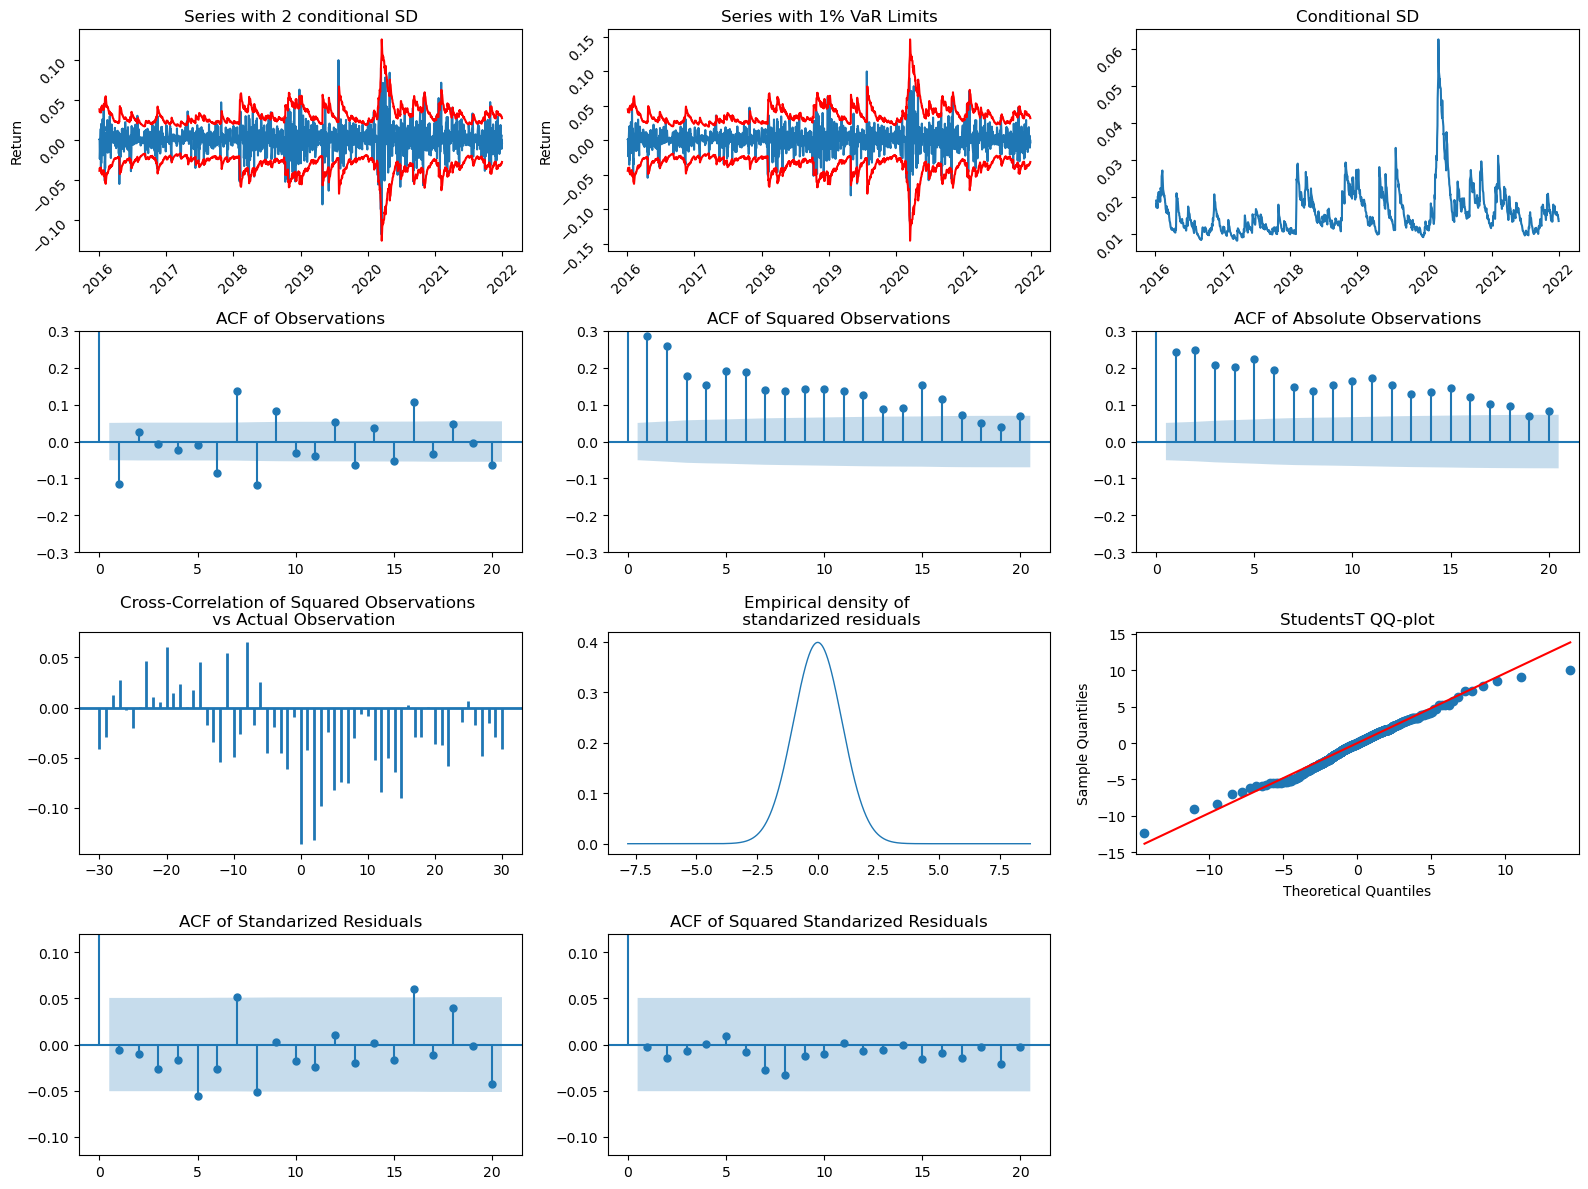

In [53]:
# Model Diagnostic Plots for the GARCH(1,1) Model with Student's t White Noise
fig, ax = plt.subplots(4, 3, figsize=(16, 12))

# Figure Row 1 Column 1
ax[0, 0].plot(goog.GOOGLE_R)
ax[0, 0].plot(2.0 * garch11_t_fit.conditional_volatility / 100.0, c="r")
ax[0, 0].plot(-2.0 * garch11_t_fit.conditional_volatility / 100.0, c="r")
ax[0, 0].tick_params(labelrotation=45)
ax[0, 0].set_title("Series with 2 conditional SD")
ax[0, 0].set_ylabel("Return")

# Figure Row 1 Column 2
VaR_1 = stats.t(df=len(goog.GOOGLE_R) - 1).ppf(0.99)
# VaR_1 = stats.norm.ppf(0.99)
ax[0, 1].plot(goog.GOOGLE_R)
ax[0, 1].plot(VaR_1 * garch11_t_fit.conditional_volatility / 100.0, c="r")
ax[0, 1].plot(-VaR_1 * garch11_t_fit.conditional_volatility / 100.0, c="r")
ax[0, 1].tick_params(labelrotation=45)
ax[0, 1].set_title("Series with 1% VaR Limits")
ax[0, 1].set_ylabel("Return")

# Figure Row 1 Column 3
ax[0, 2].plot(garch11_t_fit.conditional_volatility / 100.0)
ax[0, 2].set_title("Conditional SD")
ax[0, 2].tick_params(labelrotation=45)

# Figure Row 2 Column 1
sm.graphics.tsa.plot_acf(garch11_t_fit.resid / 100.0, lags=20, ax=ax[1, 0])
ax[1, 0].set_title("ACF of Observations")
ax[1, 0].set_ylim([-0.3, 0.3])

# Figure Row 2 Column 2
sm.graphics.tsa.plot_acf(garch11_t_fit.resid**2, lags=20, ax=ax[1, 1])
ax[1, 1].set_title("ACF of Squared Observations")
ax[1, 1].set_ylim([-0.3, 0.3])

# Figure Row 2 Column 3
sm.graphics.tsa.plot_acf(np.abs(garch11_t_fit.resid), lags=20, ax=ax[1, 2])
ax[1, 2].set_title("ACF of Absolute Observations")
ax[1, 2].set_ylim([-0.3, 0.3])

# Figure Row 3 Column 1
ax[2, 0].xcorr(
    garch11_t_fit.resid**2,
    garch11_t_fit.resid,
    usevlines=True,
    maxlags=30,
    normed=True,
    lw=2,
)
ax[2, 0].set_title("Cross-Correlation of Squared Observations \n vs Actual Observation")

# Figure Row 3 Column 2
standaraized_residuals = garch11_t_fit.std_resid
min_val = np.min(standaraized_residuals)
max_val = np.max(standaraized_residuals)
empirical_density = np.linspace(min_val, max_val, len(standaraized_residuals))
ax[2, 1].plot(empirical_density, stats.norm.pdf(empirical_density), lw=1)
ax[2, 1].set_title("Empirical density of \n standarized residuals")

# Figure Row 3 Column 3
sm.qqplot(garch11_t_fit.resid, stats.t, fit=True, line="q", ax=ax[2, 2])
ax[2, 2].set_title("StudentsT QQ-plot")

# Figure Row 4 Column 1
sm.graphics.tsa.plot_acf(garch11_t_fit.std_resid, lags=20, ax=ax[3, 0])
ax[3, 0].set_title("ACF of Standarized Residuals")
ax[3, 0].set_ylim([-0.12, 0.12])

# Figure Row 4 Column 2
sm.graphics.tsa.plot_acf((garch11_t_fit.std_resid) ** 2, lags=20, ax=ax[3, 1])
ax[3, 1].set_title("ACF of Squared Standarized Residuals")
ax[3, 1].set_ylim([-0.12, 0.12])

ax[3, 2].axis("off")
fig.tight_layout()
plt.show()

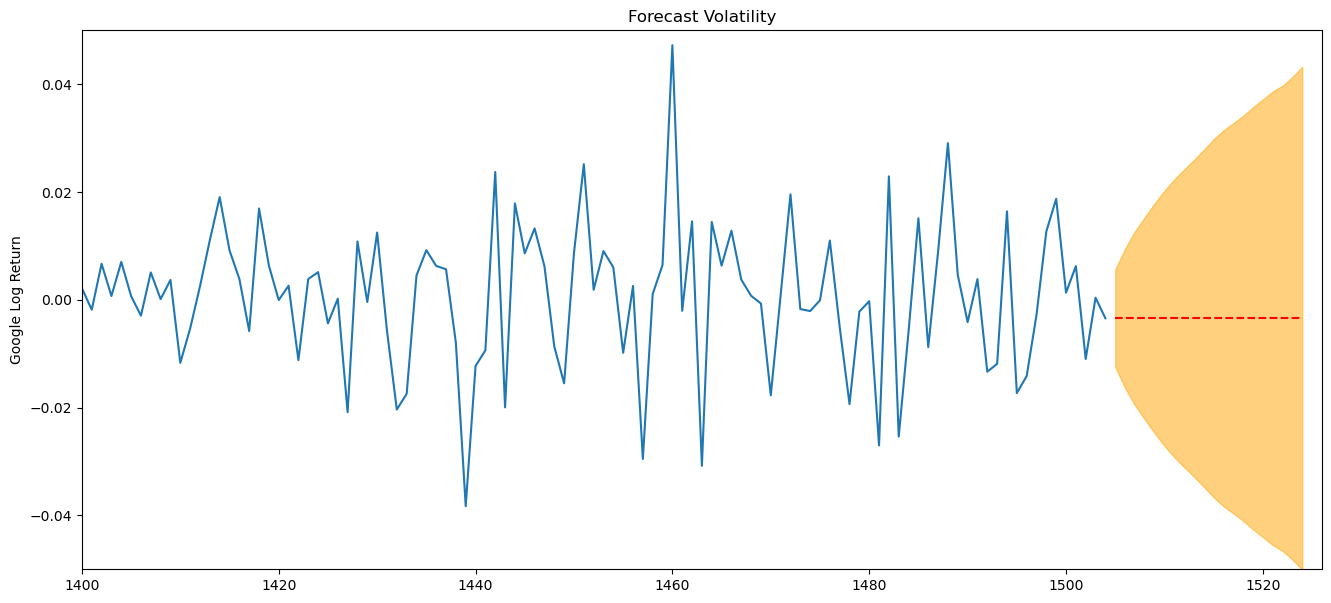

In [56]:
#20 Steps ahead forecast for GARCH1,1 with student t's white noise
horizon=20
garch_forecast= garch11_t_fit.forecast(reindex=False, horizon=horizon, method='Simulation')

googr = goog.GOOGLE_R.copy()
googr.index= list(range(len(goog_r)+1))

forecast_mean= pd.Series(garch_forecast.mean.dropna().squeeze())
forecast_mean.index= list(range(len(googr), len(googr)+horizon))

variance_fct = pd.DataFrame(data={'Forecast' : garch_forecast.variance.values[0]})
variance_fct.index = list(range(len(googr), len(googr) + horizon))

std_fct = [(variance_fct.values[i]*(i+1))**0.5 for i in range(len(variance_fct))]
volatility_fct = pd.DataFrame(std_fct)

upper_band = googr.values[-1]* (1.0 + 2*volatility_fct)
upper_band.index = variance_fct.index

lower_band = googr.values[-1]* (1.0-2*volatility_fct)
lower_band.index = variance_fct.index

plt.figure(figsize=(16,7))
plt.xlim(1400, len(googr)+21)
plt.ylim(-0.05,0.05)
googr.plot(ylabel="Google Log Return", title="Forecast Volatility")
plt.plot((upper_band + lower_band) / 2, "r--")
plt.fill_between(
    upper_band.index.tolist(),
    upper_band.values.T[0],
    lower_band.values.T[0],
    color="orange",
    alpha=0.5,
)
plt.show()


# **LESSON 3** 

In [65]:
import arviz as az
import pymc as pm
from pymc import GARCH11
from pytensor import shared
import pytensor
pytensor.config.mode = 'NUMBA'

In [2]:
import arch

ModuleNotFoundError: No module named 'arch'

In [ ]:
matplotlib numpy pandas statsmodels arch scipy sklearn pymc pytensor arviz

In [60]:
# First Round MCMC Sampling Result: Parameter Trace Plots and Marginal Density Plots

# starting parameters = blank canvas model(0.000001, 0.000001, 0.000001)
alpha_mu = shared(np.array([0.000001,0.000001], dtype=np.float64))
alpha_sigma = shared(np.array([[1000.0, 0.0],[0.0, 1000.0]], dtype=np.float64))

beta_mu = shared(np.array(0.000001, dtype=np.float64))
beta_sigma = shared(np.array(1000.0, dtype=np.float64))

#initial volatility
ivolatility = shared(np.array(0.000001, dtype=np.float64))
ivolatility_vol = shared(np.array(10.0, dtype=np.float64))

#Construct MCMC
mcmc0 = pm.Model()

with mcmc0 :
    #Create multivariate normal
    mvn = pm.MvNormal('mvNormal', mu=alpha_mu, cov=alpha_sigma, shape=2)

    #Restrict coefficient to positive values
    alp0 = pm.Deterministic('alpha0', pm.math.switch(mvn[0]>0, mvn[0], -np.inf))
    alp1 = pm.Deterministic('alpha1', pm.math.switch(mvn[1]>0, mvn[1], -np.inf))

    #Create univariate truncated normal 
    nTruncated = pm.TruncatedNormal('beta', mu = beta_mu, sigma=beta_sigma, lower=0)
    volTruncated = pm.TruncatedNormal('volatility', mu=ivolatility, sigma=ivolatility_vol, lower=0)

    #Likelihood
    likelihood = GARCH11(
        'GARCH',
        omega=alp0,
        alpha_1=alp1,
        beta_1 = nTruncated,
        initial_vol= volTruncated,
        observed= goog.GOOGLE_R.dropna()*100

    )

In [66]:
#First round of MCMC Posteriors
with mcmc0 :
    step_mcmc0 = pm.Slice()
    trace_mcmc0 = pm.sample(
        3000,
        cores=2, 
        step = step_mcmc0,
        tune=0, #No burn in
        return_inferencedata=True,
        random_seed=12345
    )
    az.plot_trace(
        trace_mcmc0,
        var_names = ['alpha0', 'alpha1', 'beta1'],
        #Plot vertical lines at GARCH11 MLE
        lines = [
            {'alpha0', {}, [0.124993]},
            {'alpha1', {}, [0.082160]},
            {'beta1', {}, [0.867127]}
        ],
        compact=False,
        legend=True,
        figsize=(16,7)
    )
    plt.tight_layout()
    plt.show()

ImportError: Numba needs NumPy 1.26 or less

In [ ]:
az.summary(trace_mcmc0, round_to=7).loc[['alpha0', 'alpha1', 'beta1'],:]

In [ ]:
# Second Round MCMC Sampling Result: Parameter Trace Plots and Marginal Density Plots

# starting parameters = MLE(0.124993, 0.082160, 0.867127)
alpha_mu = shared(np.array([0.124993, 0.082160], dtype=np.float64))
alpha_sigma = shared(np.array([[1000.0, 0.0], [0.0, 1000.0]], dtype=np.float64))

beta_mu = shared(np.array(0.867127, dtype=np.float64))
beta_sigma = shared(np.array(1000.0, dtype=np.float64))

ivolatility = shared(np.array(1.63865, dtype=np.float64))  # np.std(goog["GOOGLE_R"].dropna()*100)
ivolatility_vol = shared(np.array(10.0, dtype=np.float64))

mcmc = pm.Model()

with mcmc:
    # create a multivariate normal: p(α) ∝ φN2(α|µα,Σα) 1 {α ∈ R^2+}
    mvn = pm.MvNormal("mvNormal", mu=alpha_mu, cov=alpha_sigma, shape=2)

    # restrict the two coefficients to be greater than zero
    alp0 = pm.Deterministic("alpha0", pm.math.switch(mvn[0] > 0, mvn[0], -np.inf))
    alp1 = pm.Deterministic("alpha1", pm.math.switch(mvn[1] > 0, mvn[1], -np.inf))

    # create univariate truncated normal: p(β) ∝ φN1(β|µβ,Σβ) 1{β ∈ R+}
    nTruncated = pm.TruncatedNormal("beta", mu=beta_mu, sigma=beta_sigma, lower=0)
    volTruncated = pm.TruncatedNormal(
        "volatility", mu=ivolatility, sigma=ivolatility_vol, lower=0
    )

    # likelihood
    likelihood = GARCH11(
        "garch",
        omega=alp0,
        alpha_1=alp1,
        beta_1=nTruncated,
        initial_vol=volTruncated,
        observed=goog.GOOGLE_R.dropna() * 100,
    )

In [ ]:
# Plot Second round MCMC model posteriors
with mcmc:
    step_mmc = pm.Slice()
    trace_mmc = pm.sample(
        3000,
        cores=2,
        step=step_mmc,
        tune=0,  # no burn-in
        return_inferencedata=True,
        random_seed=12345,
    )
    az.plot_trace(
        trace_mmc,
        var_names=["alpha0", "alpha1", "beta"],
        lines=[
            ("alpha0", {}, [0.124993]),
            ("alpha1", {}, [0.082160]),
            ("beta", {}, [0.867127]),
        ],
        compact=False,
        legend=True,
        figsize=(16, 7),
    )
    plt.tight_layout()
    plt.show()


In [ ]:
az.summary(trace_mmc, round_to=7).loc[["alpha0", "alpha1", "beta"], :]

In [ ]:
# Second Round MCMC Sampling Result: Parameter Trace Plots and Density Plots After Adjustment
with mcmc:
    step_mmc_a = pm.Slice()
    trace_mmc_a = pm.sample(
        3000,
        cores=2,
        step=step_mmc_a,
        tune=250,  # burn-in = 250 steps
        return_inferencedata=True,
        random_seed=12345,
    )
    az.plot_trace(
        trace_mmc_a,
        var_names=["alpha0", "alpha1", "beta"],
        lines=[
            ("alpha0", {}, [0.124993]),
            ("alpha1", {}, [0.082160]),
            ("beta", {}, [0.867127]),
        ],
        compact=False,
        legend=True,
        figsize=(16, 7),
    )
    plt.tight_layout()
    plt.show()